In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pathlib
import torchvision
import pandas as pd

from matplotlib.patches import Ellipse
from matplotlib import transforms

import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d




<class 'torch.Tensor'>
torch.Size([2000, 2])


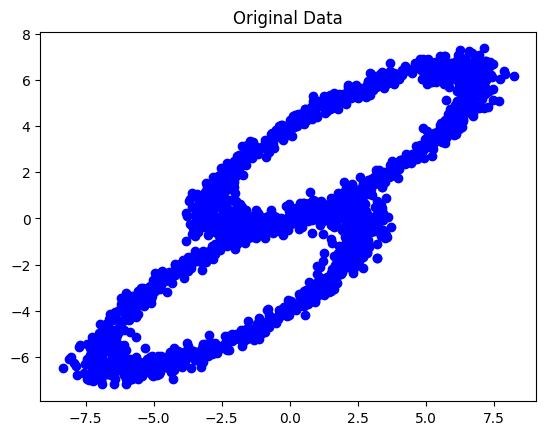

In [3]:
print(type(X))
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], marker='o', color='b')
plt.title('Original Data')
plt.show()


In [4]:
class Generator(nn.Module):
  def __init__(self, dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(dim, 100),
        nn.ReLU(),
        nn.Linear(100, 100),
        nn.ReLU(),
        nn.Linear(100, dim)
    )

  def forward(self, x):
    return self.gen(x)

class Discriminator(nn.Module):
  def __init__(self, dim):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(dim, 100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.disc(x)

In [5]:
import pathlib

saved_params_path = "./saved_params_gan"
pathlib.Path(f"./{saved_params_path}/").mkdir(parents=True, exist_ok=True)

# Loss function
BCE = nn.BCELoss()

# Dimension
N, dim = X.shape

# Hyperparameter
lr = 1e-4
num_epochs = 1000
batch_size = 256
device = 'cpu'

# Loss list
Gen_Loss = []
Dis_Loss = []

# Discriminator & Generator
dis = Discriminator(dim).to(device)
gen = Generator(dim).to(device)

# Optimizers
dis_optim = optim.Adam(dis.parameters(), lr=lr)
gen_optim = optim.Adam(gen.parameters(), lr=lr)

for epoch in range(num_epochs):
  for _ in range(10):
    # Train Discriminator

    # shuffling X
    indices = torch.randint(0, len(X), (batch_size, ))
    # sampling X
    real = X[indices].to(device)

    # sampling fake
    z = torch.randn(batch_size, 2).to(device)
    fake = gen(z)

    D_x = dis(real)
    D_G_z = dis(fake)

    D_fake_loss = BCE(D_G_z, torch.zeros_like(D_G_z))
    D_real_loss = BCE(D_x, torch.ones_like(D_x))
    D_loss = (D_real_loss + D_fake_loss) /2

    dis_optim.zero_grad()
    D_loss.backward(retain_graph=True)
    dis_optim.step()

  for _ in range(5):
    z = torch.randn(batch_size, 2).to(device)
    fake = gen(z)

    D_G_z = dis(fake)

    G_loss = BCE(D_G_z, torch.ones_like(D_G_z))

    gen_optim.zero_grad()
    G_loss.backward(retain_graph=True)
    gen_optim.step()

  if epoch % 10 == 0:
    print(f"Epoch [{epoch}/{num_epochs}]\
          Discriminator Loss: {D_loss.item():.4f}, loss G: {G_loss.item():.4f}")

  Gen_Loss.append(G_loss.item())
  Dis_Loss.append(D_loss.item())

torch.save(dis.state_dict(), f'{saved_params_path}/discriminator_{epoch}.pth')
torch.save(dis.state_dict(), f'{saved_params_path}/generator_{epoch}.pth')

Epoch [0/1000]          Discriminator Loss: 0.7433, loss G: 0.6907
Epoch [10/1000]          Discriminator Loss: 0.4745, loss G: 0.7293
Epoch [20/1000]          Discriminator Loss: 0.4013, loss G: 0.8200
Epoch [30/1000]          Discriminator Loss: 0.4176, loss G: 0.9140
Epoch [40/1000]          Discriminator Loss: 0.5099, loss G: 1.0267
Epoch [50/1000]          Discriminator Loss: 0.5758, loss G: 1.0401
Epoch [60/1000]          Discriminator Loss: 0.6010, loss G: 0.9879
Epoch [70/1000]          Discriminator Loss: 0.6541, loss G: 0.9293
Epoch [80/1000]          Discriminator Loss: 0.6681, loss G: 0.8660
Epoch [90/1000]          Discriminator Loss: 0.6669, loss G: 0.8435
Epoch [100/1000]          Discriminator Loss: 0.6630, loss G: 0.8044
Epoch [110/1000]          Discriminator Loss: 0.6533, loss G: 0.7917
Epoch [120/1000]          Discriminator Loss: 0.6506, loss G: 0.7697
Epoch [130/1000]          Discriminator Loss: 0.6502, loss G: 0.7818
Epoch [140/1000]          Discriminator Loss:

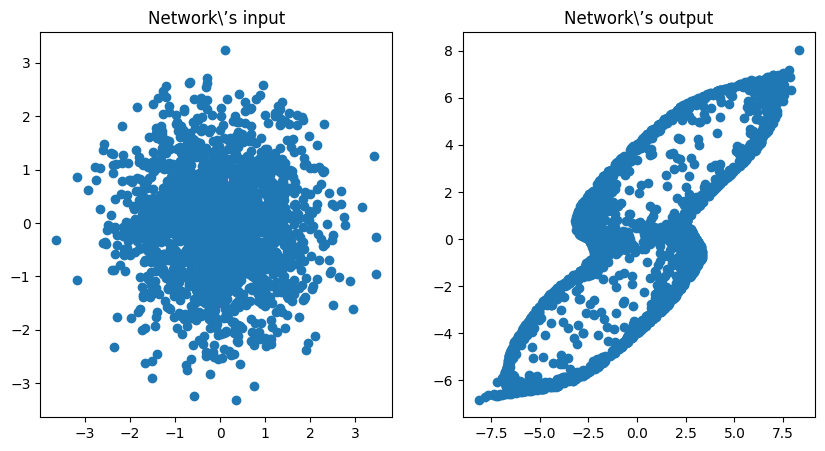

In [6]:
z=torch.randn((2000,2))
xhat=gen(z.to(device))
xhat=xhat.detach().cpu()
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(z[:,0],z[:,1])
ax[0].set_title("Network\’s input")
ax[1].scatter(xhat[:,0],xhat[:,1])
ax[1].set_title("Network\’s output")
plt.show()